In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, auc
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Fetch AIDS dataset
aids_dataset = fetch_ucirepo(id=890)
X = aids_dataset.data.features
y = aids_dataset.data.targets

df = pd.concat([X, y], axis=1)

# Save dataset
csv_filename = "AIDS_Dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"AIDS dataset saved as {csv_filename}")

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split into features (X) and target (y)
X = df.drop(columns=[y.columns[0]]).values
y = y.iloc[:, 0].values

# Verify dataset information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check if binary classification
is_binary = len(np.unique(y)) == 2
print(f"\nIs Binary Classification: {is_binary}")

AIDS dataset saved as AIDS_Dataset.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20 


Results for Logistic Regression:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8271		0.9309	0.5647
2	0.8084		0.8776	0.5060
3	0.8692		0.9227	0.6889
4	0.8645		0.9009	0.6882
5	0.8458		0.9000	0.6598
6	0.7897		0.8565	0.5055
7	0.8458		0.8967	0.6526
8	0.8364		0.8454	0.6154
9	0.8271		0.9038	0.6337
10	0.8458		0.9111	0.6374


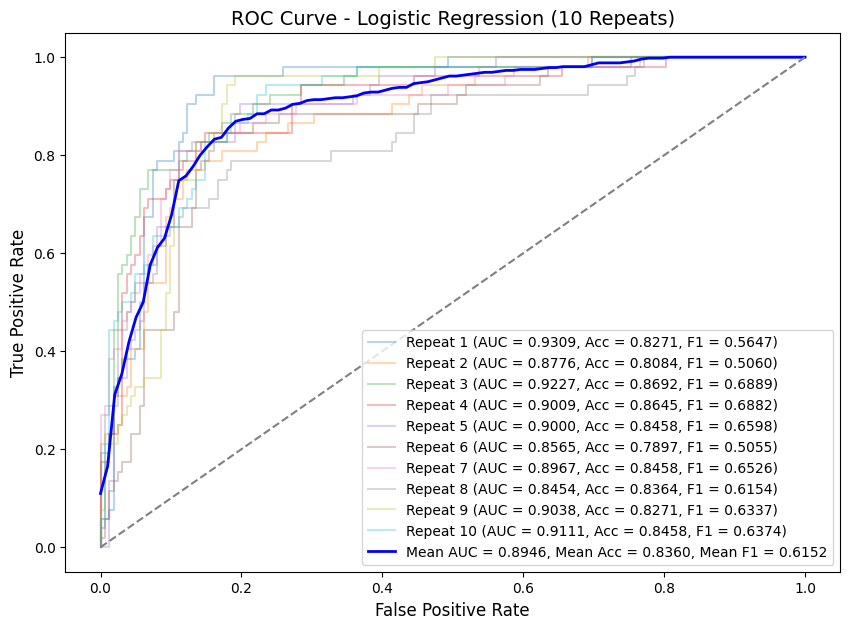


Results for Logistic Regression (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8738		0.9243	0.7216
2	0.8318		0.8835	0.5714
3	0.8738		0.9095	0.7033
4	0.8738		0.9005	0.7158
5	0.8738		0.8847	0.7273
6	0.8411		0.8788	0.6383
7	0.8738		0.9207	0.7158
8	0.8738		0.8565	0.6897
9	0.8505		0.9408	0.6800
10	0.8505		0.9030	0.6444


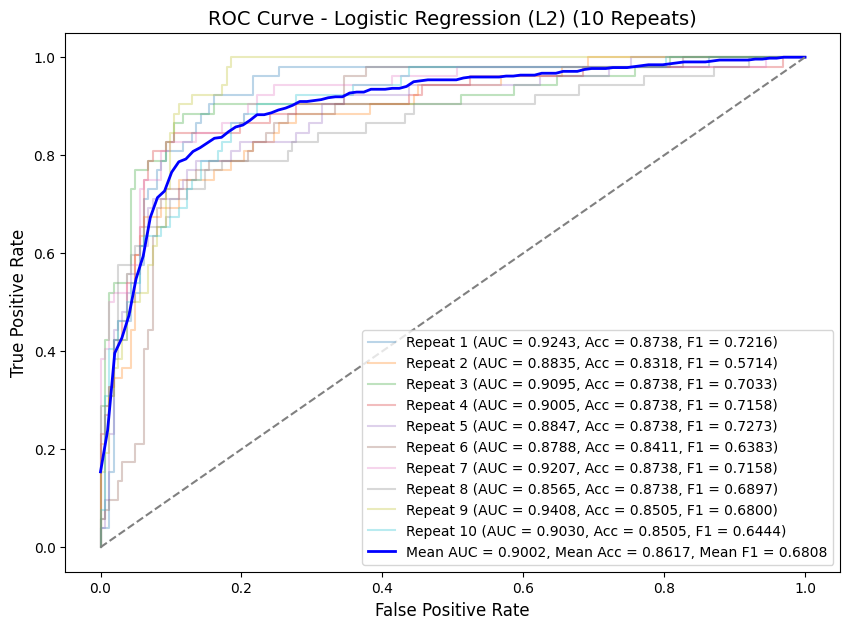


Results for Logistic Regression (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8738		0.9311	0.7216
2	0.8364		0.8927	0.5882
3	0.8738		0.9103	0.7033
4	0.8738		0.9054	0.7216
5	0.8738		0.8863	0.7216
6	0.8364		0.8795	0.6237
7	0.8785		0.9228	0.7292
8	0.8832		0.8608	0.7126
9	0.8645		0.9433	0.7184
10	0.8598		0.8941	0.6739


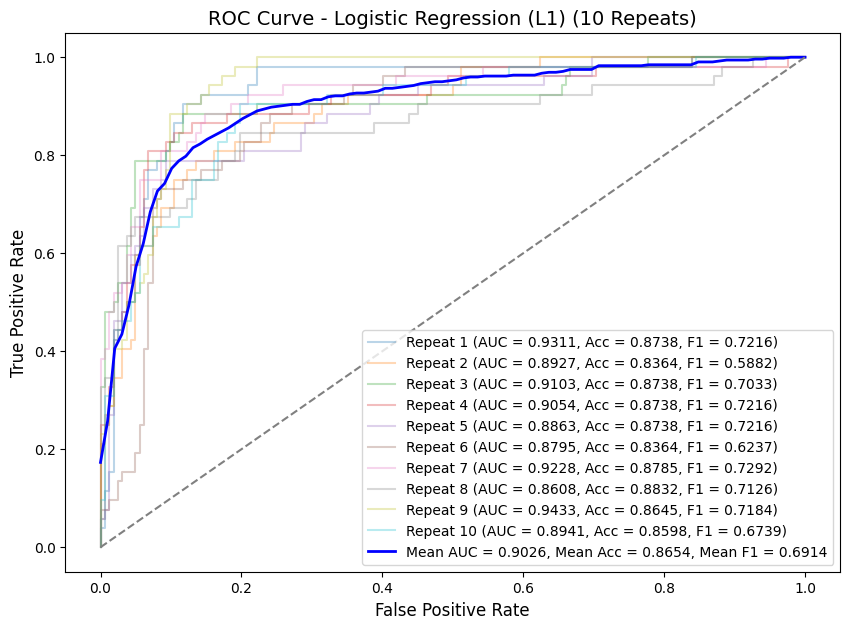


Results for 3-Layer NN:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8692		0.9334	0.6957
2	0.8131		0.8221	0.5238
3	0.8505		0.9108	0.6279
4	0.8037		0.8553	0.5116
5	0.8178		0.8646	0.6286
6	0.8178		0.8809	0.5714
7	0.8178		0.8686	0.5806
8	0.8271		0.8056	0.5843
9	0.8411		0.8814	0.6531
10	0.7944		0.8191	0.5111


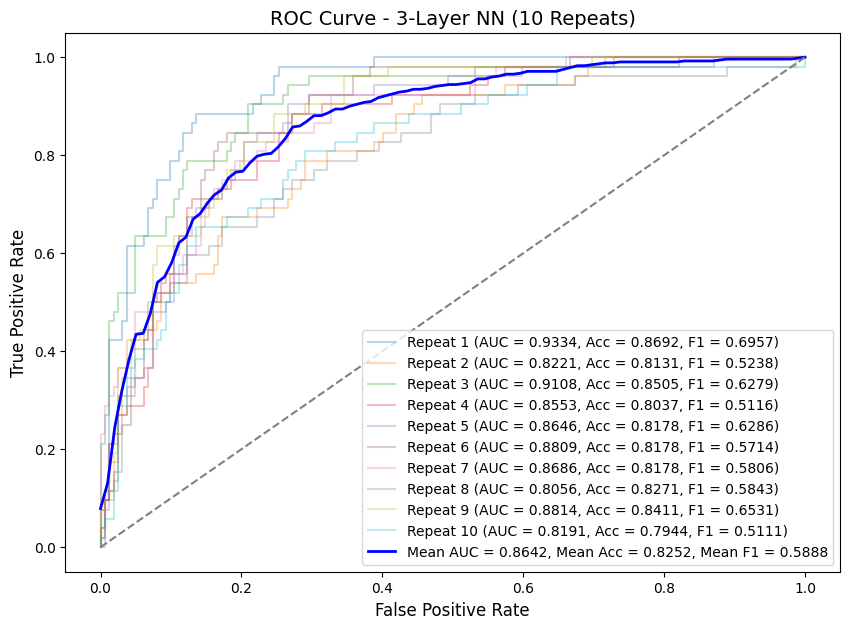


Results for 3-Layer NN (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8318		0.9023	0.5909
2	0.7897		0.8553	0.4706
3	0.8551		0.9000	0.6437
4	0.8271		0.8803	0.5843
5	0.8131		0.8335	0.6000
6	0.7757		0.8466	0.4667
7	0.8084		0.8471	0.5495
8	0.7757		0.7673	0.5102
9	0.2430		0.5000	0.3910
10	0.8224		0.8532	0.5957


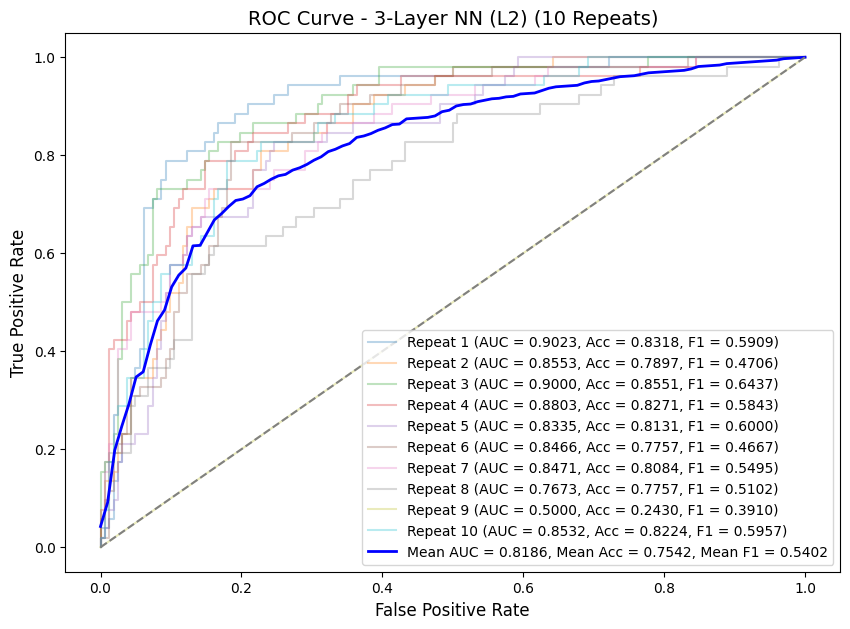


Results for 3-Layer NN (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8598		0.9044	0.6591
2	0.2430		0.5000	0.3910
3	0.8458		0.8395	0.5926
4	0.8505		0.8953	0.6596
5	0.8084		0.8560	0.5773
6	0.8178		0.8231	0.5517
7	0.8271		0.8885	0.5747
8	0.8084		0.8133	0.5591
9	0.8224		0.8710	0.5957
10	0.8271		0.8562	0.5843


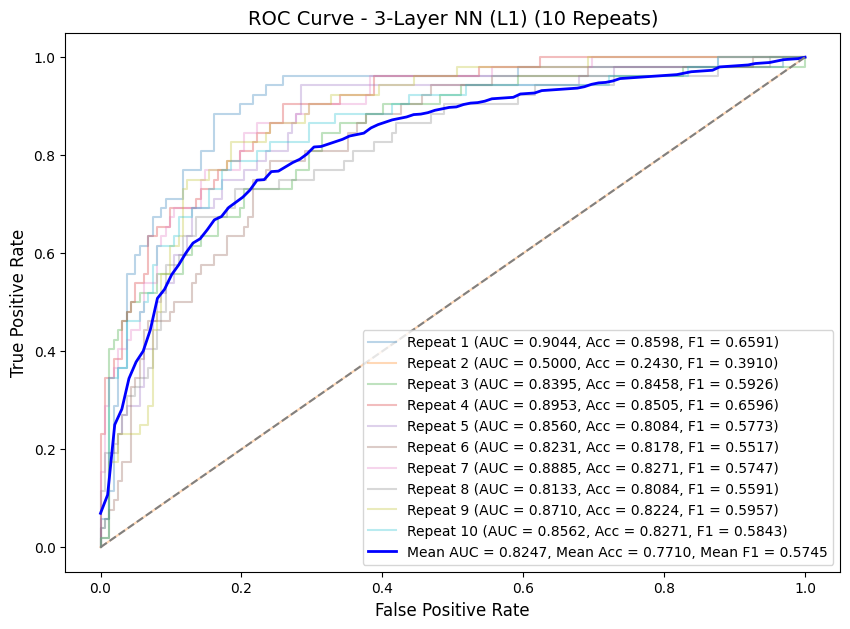

In [5]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, auc

# Function to train and evaluate a neural network
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Function to compute ROC curve, accuracy, and F-measure for a model
def compute_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability estimates
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    
    return fpr, tpr, auc_score, acc, f1

# Function to train a neural network and compute ROC, accuracy, and F-measure
def train_nn_metrics(X_train, y_train, X_test, y_test):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    # Model, Loss, Optimizer
    model = ThreeLayerNN(X_train.shape[1]).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate
    with torch.no_grad():
        y_probs = model(X_test_tensor).cpu().numpy()
        preds = (y_probs > 0.5).astype(int)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = auc(fpr, tpr)
    
    return fpr, tpr, auc_score, acc, f1

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "3-Layer NN": "nn",  # Placeholder for Neural Network
    "3-Layer NN (L2)": "nn",  # Placeholder for Neural Network with L2
    "3-Layer NN (L1)": "nn"  # Placeholder for Neural Network with L1
}

# Plot ROC curve for each model separately
for model_name, model in models.items():
    plt.figure(figsize=(10, 7))  # New full-size figure for each model
    
    mean_fpr = np.linspace(0, 1, 100)
    tprs, aucs, accs, f1s = [], [], [], []

    print(f"\nResults for {model_name}:")
    print("Repeat\tAccuracy\tAUC\t\tF-Measure")
    print("-" * 50)

    for repeat in range(10):  # 10 repeats
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=repeat)
        train_index, test_index = next(skf.split(X, y))  # Get a new split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if model == "nn":
            fpr, tpr, auc_score, acc, f1 = train_nn_metrics(X_train, y_train, X_test, y_test)
        else:
            fpr, tpr, auc_score, acc, f1 = compute_metrics(model, X_train, y_train, X_test, y_test)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc_score)
        accs.append(acc)
        f1s.append(f1)

        print(f"{repeat+1}\t{acc:.4f}\t\t{auc_score:.4f}\t{f1:.4f}")
        plt.plot(fpr, tpr, alpha=0.3, label=f"Repeat {repeat+1} (AUC = {auc_score:.4f}, Acc = {acc:.4f}, F1 = {f1:.4f})")

    # Compute mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    mean_acc = np.mean(accs)
    mean_f1 = np.mean(f1s)

    plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f"Mean AUC = {mean_auc:.4f}, Mean Acc = {mean_acc:.4f}, Mean F1 = {mean_f1:.4f}")

    # Plot random baseline (AUC = 0.5)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    # Set titles and labels
    plt.title(f"ROC Curve - {model_name} (10 Repeats)", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)

    # Show each plot separately
    plt.show()


In [8]:
import numpy as np
from scipy.stats import ttest_rel
import itertools
import pandas as pd

# Define accuracy results for each model
logreg = [0.8271, 0.8084, 0.8692, 0.8645, 0.8458, 0.7897, 0.8458, 0.8364, 0.8271, 0.8458]
logreg_l2 = [0.8738, 0.8318, 0.8738, 0.8738, 0.8738, 0.8411, 0.8738, 0.8738, 0.8505, 0.8505]
logreg_l1 = [0.8738, 0.8364, 0.8738, 0.8738, 0.8738, 0.8364, 0.8785, 0.8832, 0.8645, 0.8598]
nn = [0.8692, 0.8131, 0.8505, 0.8037, 0.8178, 0.8178, 0.8178, 0.8271, 0.8411, 0.7944]
nn_l2 = [0.8318, 0.7897, 0.8551, 0.8271, 0.8131, 0.7757, 0.8084, 0.7757, 0.2430, 0.8224]
nn_l1 = [0.8598, 0.2430, 0.8458, 0.8505, 0.8084, 0.8178, 0.8271, 0.8084, 0.8224, 0.8271]

# Store model names and accuracy lists
model_names = [
    "Logistic Regression", 
    "Logistic Regression (L2)", 
    "Logistic Regression (L1)", 
    "3-Layer NN", 
    "3-Layer NN (L2)", 
    "3-Layer NN (L1)"
]
model_accuracies = [logreg, logreg_l2, logreg_l1, nn, nn_l2, nn_l1]

# Perform paired t-tests and store results
alpha = 0.05  # Significance level
results = []

for (i, j) in itertools.combinations(range(len(model_names)), 2):
    stat, p = ttest_rel(model_accuracies[i], model_accuracies[j])
    significant = "Yes" if p < alpha else "No"
    results.append([model_names[i], model_names[j], stat, p, significant])

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "t-statistic", "p-value", "Significant Difference?"])

# Print results
print(results_df.to_string(index=False))

                 Model 1                  Model 2  t-statistic  p-value Significant Difference?
     Logistic Regression Logistic Regression (L2)    -4.959672 0.000781                     Yes
     Logistic Regression Logistic Regression (L1)    -5.901922 0.000229                     Yes
     Logistic Regression               3-Layer NN     1.019388 0.334638                      No
     Logistic Regression          3-Layer NN (L2)     1.457986 0.178838                      No
     Logistic Regression          3-Layer NN (L1)     1.158265 0.276567                      No
Logistic Regression (L2) Logistic Regression (L1)    -2.053087 0.070262                      No
Logistic Regression (L2)               3-Layer NN     4.989647 0.000749                     Yes
Logistic Regression (L2)          3-Layer NN (L2)     1.918980 0.087199                      No
Logistic Regression (L2)          3-Layer NN (L1)     1.628913 0.137772                      No
Logistic Regression (L1)               3


**L1 and L2 variations of Logistic Regression are significantly different from the base Logistic Regression model.3-Layer NN differs significantly from both L1 and L2 variations of Logistic Regression.Among different versions of 3-Layer NN, no significant differences were found.Between L1 and L2 Logistic Regression variations, no significant difference was found.**
